# Notes

In [1]:
import pandas as pd
import geopandas as geo
import numpy as np

manipulation_geometry = 'EPSG:3857'
plot_geometry = 'WGS84'

/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
folder = '/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/countries/'
col = geo.read_file(folder + 'colombia/colombia.shp')
ecu = geo.read_file(folder + 'ecuador/ecuador.shp')
ven = geo.read_file(folder + 'venezuela/venezuela.shp')
pan = geo.read_file(folder + 'panama/panama.shp')
per = geo.read_file(folder + 'peru/peru.shp')
bra = geo.read_file(folder + 'brasil/brasil.shp')

other = [ecu,ven,pan, per, bra]
other_names = ['Ecuador', 'Venezuela', 'Panama', 'Peru', 'Brazil']


buffer = 25 # Km
manipulation_geoemtry = 'EPSG:3395'
plot_geoemtry = 'WGS84'


In [3]:

values = []
geometries = []
for i in range(len(other)):
    o = other[i]
    new_geo = col.geometry.to_crs(manipulation_geoemtry).buffer(buffer*1000).intersection(o.geometry.to_crs(manipulation_geoemtry)).to_crs(plot_geoemtry).values[0]
    values.append({'frontera': other_names[i]})
    geometries.append(new_geo)
    

fronteras = geo.GeoDataFrame(values, geometry=geometries, crs=plot_geoemtry)
fronteras


,frontera,geometry
0,Ecuador,"MULTIPOLYGON (((-75.46894 -0.31011, -75.47533 ..."
1,Venezuela,"MULTIPOLYGON (((-71.91876 11.27500, -71.92148 ..."
2,Panama,"MULTIPOLYGON (((-78.04859 7.43029, -78.04776 7..."
3,Peru,"POLYGON ((-70.18898 -4.32109, -70.19528 -4.311..."
4,Brazil,"MULTIPOLYGON (((-66.67052 1.04202, -66.68646 1..."


<AxesSubplot:>

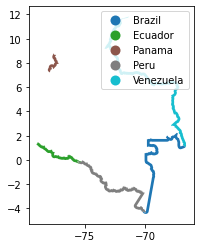

In [4]:
fronteras['id'] = range(fronteras.shape[0])
fronteras.plot(column = 'frontera', legend = True)

In [35]:
fronteras.to_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/frontiers/frontiers.shp', index = False)

# Rivers

In [5]:
import pandas as pd
import geopandas as geo
import numpy as np

manipulation_geometry = 'EPSG:3857'
plot_geometry = 'WGS84'

In [6]:
rivers = geo.read_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/river_lines/river_lines.shp')
bounds = rivers.geometry.to_crs(manipulation_geometry).bounds
rivers['length'] = np.sqrt((bounds.minx - bounds.maxx)**2 + (bounds.miny - bounds.maxy)**2)/1000
rivers = rivers[['NOMBRE_GEO','geometry','length']].dissolve(by = 'NOMBRE_GEO', aggfunc='sum')
rivers

,geometry,length
NOMBRE_GEO,,
<NULL>,"MULTILINESTRING ((-77.96686 2.42443, -77.96692...",2.752711
ANTIGUO CAUCE RÍO NECHÍ,"MULTILINESTRING ((-74.80263 7.61373, -74.80265...",38.295936
ARROY JIPUMAHANA,"MULTILINESTRING ((-71.64509 12.27420, -71.6450...",9.708019
ARROYO ARIATU,"MULTILINESTRING ((-71.71448 12.17697, -71.7142...",2.302757
ARROYO CAYUCHAIN,"MULTILINESTRING ((-71.87161 11.83185, -71.8714...",6.977657
...,...,...
RÍO ZULIA,"MULTILINESTRING ((-72.62644 7.85872, -72.62639...",141.132429
RÍO ZUNGO,"MULTILINESTRING ((-76.75290 7.87929, -76.75295...",6.469485
RÍO ÑAMBÍ,"MULTILINESTRING ((-78.03249 1.39540, -78.03249...",67.004003


In [7]:
rivers['length'] = rivers['length'] / 2
rivers = rivers.sort_values('length', ascending = False).reset_index()
rivers

,NOMBRE_GEO,geometry,length
0,RÍO MAGDALENA,"MULTILINESTRING ((-76.19891 1.86418, -76.19912...",1599.307276
1,RÍO PUTUMAYO,"MULTILINESTRING ((-69.72504 -2.90392, -69.7248...",1347.180158
2,RÍO CAQUETÁ,"MULTILINESTRING ((-70.08363 -1.58749, -70.0825...",1157.015345
3,RÍO META,"MULTILINESTRING ((-73.08082 3.91158, -73.08251...",1069.574721
4,RÍO CAUCA,"MULTILINESTRING ((-76.49022 2.19680, -76.49098...",915.415935
...,...,...,...
1929,ESTERO EL DESENGAÑO,"LINESTRING (-72.51201 4.67838, -72.51138 4.678...",0.202960
1930,CIÉNAGA SABOREATE,"LINESTRING (-73.97914 8.94165, -73.97983 8.941...",0.199783
1931,RIO SENCELLA,"MULTILINESTRING ((-75.15545 0.40981, -75.15553...",0.187487
1932,RÍO TOLOTA,"LINESTRING (-73.37041 6.11405, -73.37046 6.114...",0.182310


In [8]:
rivers_clean = rivers[rivers.NOMBRE_GEO.apply(lambda s: 'RÍO' in s)]
rivers_clean = rivers_clean.rename(columns = {'NOMBRE_GEO' : 'name'})
rivers_clean

,name,geometry,length
0,RÍO MAGDALENA,"MULTILINESTRING ((-76.19891 1.86418, -76.19912...",1599.307276
1,RÍO PUTUMAYO,"MULTILINESTRING ((-69.72504 -2.90392, -69.7248...",1347.180158
2,RÍO CAQUETÁ,"MULTILINESTRING ((-70.08363 -1.58749, -70.0825...",1157.015345
3,RÍO META,"MULTILINESTRING ((-73.08082 3.91158, -73.08251...",1069.574721
4,RÍO CAUCA,"MULTILINESTRING ((-76.49022 2.19680, -76.49098...",915.415935
...,...,...,...
1849,RÍO JENGAMECODÁ,"MULTILINESTRING ((-76.40334 6.58781, -76.40327...",0.640623
1891,RÍO PALOMA,"MULTILINESTRING ((-75.09110 5.68484, -75.09125...",0.511067
1908,RÍO TOY,"MULTILINESTRING ((-75.26994 3.95226, -75.26994...",0.433362
1927,RÍO LAS PIEDRAS,"MULTILINESTRING ((-76.83146 2.36926, -76.83154...",0.234623


In [9]:
rivers_clean.geometry = rivers_clean.geometry.to_crs(manipulation_geometry).simplify(200).buffer(1000).to_crs(plot_geometry)
rivers_clean

,name,geometry,length
0,RÍO MAGDALENA,"MULTIPOLYGON (((-75.42103 2.71252, -75.42093 2...",1599.307276
1,RÍO PUTUMAYO,"MULTIPOLYGON (((-76.61873 0.60374, -76.61874 0...",1347.180158
2,RÍO CAQUETÁ,"POLYGON ((-76.64472 1.44301, -76.64472 1.44309...",1157.015345
3,RÍO META,"POLYGON ((-73.09149 3.91425, -73.09149 3.91433...",1069.574721
4,RÍO CAUCA,"MULTIPOLYGON (((-75.79404 6.52783, -75.79450 6...",915.415935
...,...,...,...
1849,RÍO JENGAMECODÁ,"POLYGON ((-76.41232 6.58777, -76.41233 6.58783...",0.640623
1891,RÍO PALOMA,"POLYGON ((-75.10023 5.68463, -75.10023 5.68479...",0.511067
1908,RÍO TOY,"POLYGON ((-75.26118 3.95028, -75.26119 3.95027...",0.433362
1927,RÍO LAS PIEDRAS,"POLYGON ((-76.84067 2.36876, -76.84068 2.36904...",0.234623


<AxesSubplot:>

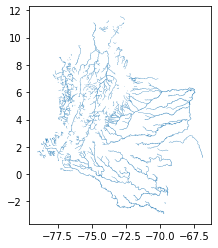

In [10]:
rivers_clean.plot()

In [11]:
rivers_clean['id'] = range(rivers_clean.shape[0])
rivers_clean

,name,geometry,length,id
0,RÍO MAGDALENA,"MULTIPOLYGON (((-75.42103 2.71252, -75.42093 2...",1599.307276,0
1,RÍO PUTUMAYO,"MULTIPOLYGON (((-76.61873 0.60374, -76.61874 0...",1347.180158,1
2,RÍO CAQUETÁ,"POLYGON ((-76.64472 1.44301, -76.64472 1.44309...",1157.015345,2
3,RÍO META,"POLYGON ((-73.09149 3.91425, -73.09149 3.91433...",1069.574721,3
4,RÍO CAUCA,"MULTIPOLYGON (((-75.79404 6.52783, -75.79450 6...",915.415935,4
...,...,...,...,...
1849,RÍO JENGAMECODÁ,"POLYGON ((-76.41232 6.58777, -76.41233 6.58783...",0.640623,679
1891,RÍO PALOMA,"POLYGON ((-75.10023 5.68463, -75.10023 5.68479...",0.511067,680
1908,RÍO TOY,"POLYGON ((-75.26118 3.95028, -75.26119 3.95027...",0.433362,681
1927,RÍO LAS PIEDRAS,"POLYGON ((-76.84067 2.36876, -76.84068 2.36904...",0.234623,682


In [12]:
rivers_clean.to_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/cleaned/geo/main_rivers/main_rivers.shp')

/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
